# Project: K-means Clustering for Customer Segmentation Analysis
- Problem: we don’t know if we have different types of customers and how to approach them
- Goals: We want to understand better our customers; We want to have clear criteria to segment our customers
- Why? To perform specific actions to improve the customer experience

# Techniques: k-means
Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).

### Wholesale customers Data Set. Abreu, N. (2011).

This dataset has the following attributes:

FRESH: annual spending (m.u.) on fresh products (Continuous);

MILK: annual spending (m.u.) on milk products (Continuous);

GROCERY: annual spending (m.u.) on grocery products (Continuous);

FROZEN: annual spending (m.u.) on frozen products (Continuous)

DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);

CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)

REGION: customers Region of Lisbon, Oporto or Other (Nominal)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline 

In [21]:
df=pd.read_csv("Wholesale_customers_data.csv")

In [22]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [23]:
df.shape

(440, 8)

In [24]:
df.loc[df['Channel']==1, 'Horeca']=1
df.loc[df['Channel']!=1, 'Horeca']=0
df.loc[df['Channel']==2, 'Retail']=1
df.loc[df['Channel']!=2, 'Retail']=0
df.loc[df['Region']==1, 'Lisbon']=1
df.loc[df['Region']!=1, 'Lisbon']=0
df.loc[df['Region']==2, 'Oporto']=1
df.loc[df['Region']!=2, 'Oporto']=0
df.loc[df['Region']==3, 'Others']=1
df.loc[df['Region']!=3, 'Others']=0

In [25]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,0.677273,0.322727,0.1750,0.106818,0.718182
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.468052,0.468052,0.3804,0.309234,0.450397
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,1.000000,0.000000,0.0000,0.000000,1.000000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,1.000000,1.000000,0.0000,0.000000,1.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,1.000000,1.000000,1.0000,1.000000,1.000000


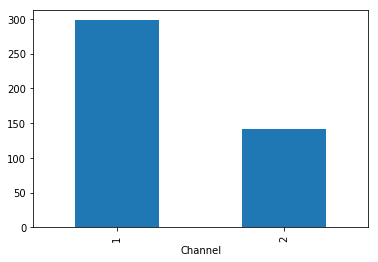

In [26]:
df.groupby(df['Channel'])['Fresh'].count().plot.bar()

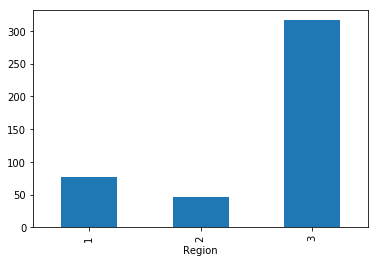

In [27]:
df.groupby(df['Region'])['Fresh'].count().plot.bar()

In [28]:
df=df.drop(['Channel','Region'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a207f09b0>,
      dtype=object)

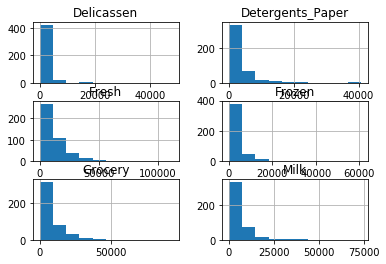

In [29]:
 df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].hist()

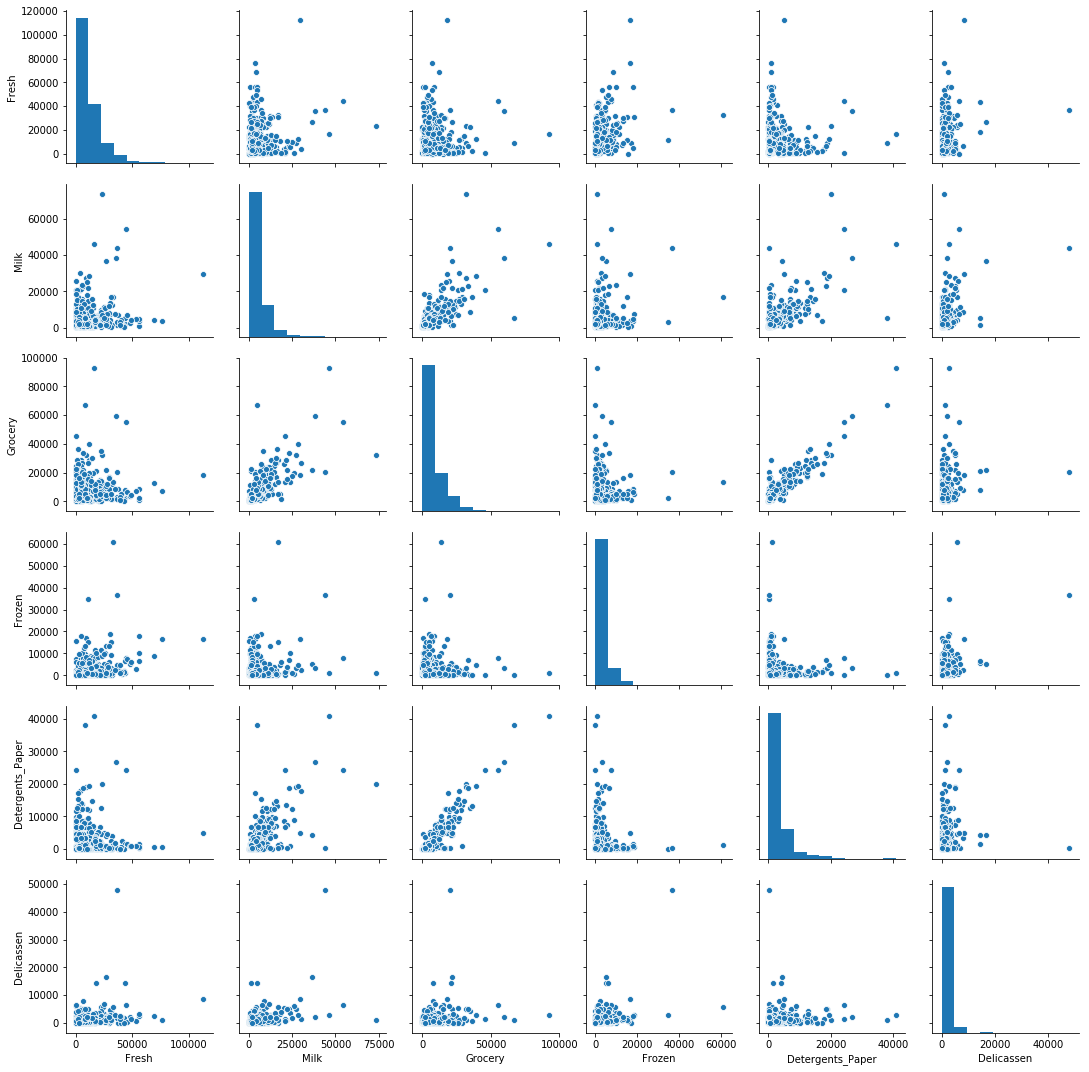

In [30]:
sns.pairplot(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

In [31]:
from sklearn import cluster, datasets, decomposition, preprocessing
#from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering

### Normalize and scale all variables to make sure 
1. all continous variables are nomally distributed;
2. all variables are on the same scale.

In [32]:
normalized = preprocessing.quantile_transform(df, output_distribution='normal')

/Users/lingfeimao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2660: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)
/Users/lingfeimao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (440). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


#### This method transforms the features to follow a uniform or a normal distribution. 
Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [33]:
scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1)).fit(normalized)
scaled = scaler.transform(normalized)

#### This method transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

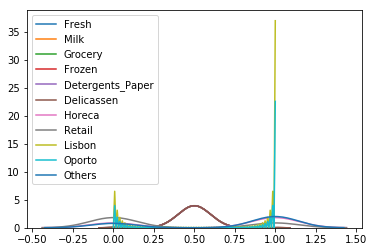

In [34]:
import seaborn as sns
df_scaled = pd.DataFrame(scaled, columns=df.columns)
for i in df.columns:
    sns.kdeplot(df_scaled[i])

In [53]:
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0.540419,0.594951,0.536848,0.360119,0.545271,0.531583,0.0,1.0,0.0,0.0,1.0
1,0.485393,0.598596,0.555348,0.510730,0.551504,0.561963,0.0,1.0,0.0,0.0,1.0
2,0.479249,0.588044,0.539223,0.533326,0.556649,0.718982,0.0,1.0,0.0,0.0,1.0
3,0.544048,0.414432,0.491478,0.612644,0.476995,0.564004,1.0,0.0,0.0,0.0,1.0
4,0.602387,0.536258,0.533326,0.572481,0.531583,0.678264,0.0,1.0,0.0,0.0,1.0


## Quick Clustering

In [59]:
clusterer = KMeans(n_clusters=5, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels

In [60]:
df.groupby(df['cluster'], as_index=False)["Fresh"].count()

,cluster,Fresh
0,0,59
1,1,211
2,2,105
3,3,28
4,4,37


In [61]:
df_5 = df.groupby(df['cluster'], as_index=False).mean()
df_5

,cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542,1.0,0.0,1.000000,0.000000,0.0
1,1,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,1.0,0.0,0.000000,0.000000,1.0
2,2,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524,0.0,1.0,0.000000,0.000000,1.0
3,3,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857,1.0,0.0,0.000000,1.000000,0.0
4,4,6273.135135,9965.864865,17370.135135,2048.243243,8320.270270,1546.918919,0.0,1.0,0.486486,0.513514,0.0


In [62]:
df_5.to_csv('quick_result.csv')

In [41]:
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(df_scaled)
df['cluster'] = cluster_labels
#df.groupby(df['cluster'], as_index=False).mean().to_csv('quick_result_3.csv')

In [58]:
df.groupby(df['cluster'], as_index=False)["Fresh"].count()

,cluster,Fresh
0,0,87
1,1,211
2,2,142


In [57]:
df_3 = df.groupby(df['cluster'], as_index=False).mean()
df_3

,cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Horeca,Retail,Lisbon,Oporto,Others
0,0,12499.402299,3366.218391,4145.011494,3969.804598,799.965517,1167.781609,1.0,0.0,0.678161,0.321839,0.000000
1,1,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,1.0,0.0,0.000000,0.000000,1.000000
2,2,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,0.0,1.0,0.126761,0.133803,0.739437


In [56]:
df_3.to_csv('quick_result_3.csv')

## Property of each cluster
Cluster 0: Customers are mostly from Hotel/Restaurant/Cafe channel. They are from region Lisbon and Oporto. They spend more on Fresh, Frozen. They spend less on Milk, Grocery, and Detergents_Paper.

Cluster 1: Customers are mostly from Hotel/Restaurant/Cafe channel. They are from region Others. They spend more on Fresh, Frozen, and Delicassen products. They spend less on Milk, Grocery, and Detergents_Paper.

Cluster 2: Customers are mostly from Retail channel. They spend mostly on Milk, Grocery, Detergents_Paper. They spend less on Fresh, Frozen.

## Marketing strategies for the customer segments
Based on the 3 clusters, we could formulate marketing strategies relevant to each cluster:

- For Cluster 0: Customers are mostly from Hotel/Restaurant/Cafe channel. They are from region Lisbon and Oporto. These customers tend to spend more on Fresh and Frozen products. There could be some discounted pricing on those products in order to increase the spend from this segment.

- For Cluster 1: Customers are mostly from Hotel/Restaurant/Cafe channel. They are from region Others. These customers tend to spend more on Fresh, Frozen, and Delicassen products. There could be some discounted pricing on those products in order to increase the spend from this segment.

- For Cluster 2: Customers are mostly from Retail channel. These customers tend to spend more on Milk, Grocery, and Detergents_Paper products. There could be some discounted pricing based promotional campaigns for this group so as to retain them.

## How to find an optimal solution?

- K: scree plot, how similar are groups
- seed: silouette score, how "accurately" are observations assigned
- number of iterations: until change is minimal

In [46]:
def scree(dat, max_clust=10):
    if type(dat) != np.ndarray:
        dat = np.array(dat)
    ss = []
    ss.append(sum(np.var(dat, axis=0)) * (len(dat)-1))
    
    for i in range(2, max_clust+1):
        ssw = []
        k_means = cluster.KMeans(n_clusters=i,max_iter=150).fit(dat)
        clust = k_means.labels_
        for j in set(clust):
            ssw.append(sum(np.var(dat[clust == j], axis=0) * (len(dat[clust==j]) - 1)))
        ss.append(sum(ssw))
    
    clust_index = range(1,max_clust+1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    plt.plot(clust_index,ss, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Total Within Sums of Squares")
    print(ss)
    plt.show()

[413.5880469427166, 214.40896477126873, 118.03484893769208, 74.59868905302685, 39.19567559628502, 21.132099246449606, 18.489167457842832, 16.982754086326505, 15.871776554285928, 15.159458349824664]


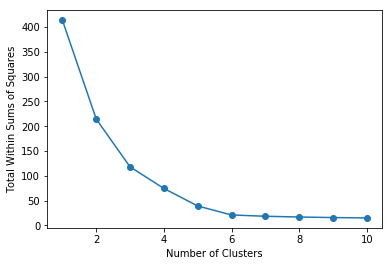

In [47]:
scree(df_scaled)

## Other approaches
- K-medoids
- GMM
- hierarchical clustering